<h2> Model Creation, Exploration, and Evaluation</h2>
• I chose two different datasets to test against the kmeans algorithm. A mushroom dataset that determines whether a mushroom is poisonous or not and a car dataset that determines the car's mpg with given characteristics

• With these two datasets I decided to try and determine if I could determine whether a mushroom is poisonous or not and how many mpg a car gets with respect to the mushroom and car datasets

• I evaluate my own model against sklearn at the end of this notebook

For this algo, there are 5 steps:

1. Randomly pick k centriods initially
2. Find the distance between each data point in training set with the centriods
3. Assign each data point to the closest centroiod according to the closest Euclidian distance
4. Update centroid by taking the average of the points in each clustering group
5. Repeat steps 2 - 4 until the centroids do not change

5 cont. Run over testing model with the cemented values for the centroids

In [185]:
#imports
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [4]:
#data
#for each data we will be clustering, 
# for auto we will be predicting mpg
# for mushrooms we will determine whether it is poisonous or not
auto_data = pd.read_csv('../data/auto-mpg.csv')
shroom_data = pd.read_csv('../data/mushrooms.csv')

In [66]:
# Exploatory Data Analysis
# function for scatter plotting columns against test column
def graph_columns(dataset, other_columns, test_col):
    fig = plt.figure(figsize=(20, 20))
    
    subplot_num = 1
    for col in other_columns:
        if str(col).lower() == str(test_col).lower():
            continue
        plt.xticks([], [])
        plt.yticks([], [])
        plt.subplot(15, 2, subplot_num)
        plt.scatter(dataset[col], dataset[test_col])
        plt.grid(True)
        plt.xlabel (col, fontweight = 'bold')
        plt.ylabel (test_col.capitalize (), fontweight = 'bold')
        plt.xticks([], [])
        plt.yticks([], [])
        subplot_num += 1
    fig.tight_layout()
    plt.show()

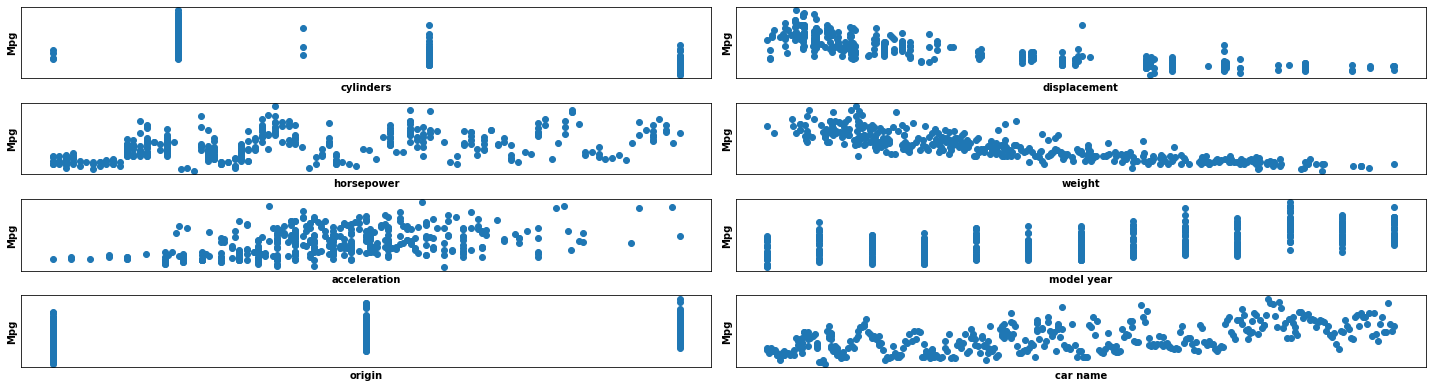

In [67]:
graph_columns(auto_data, list(auto_data.columns), "mpg")

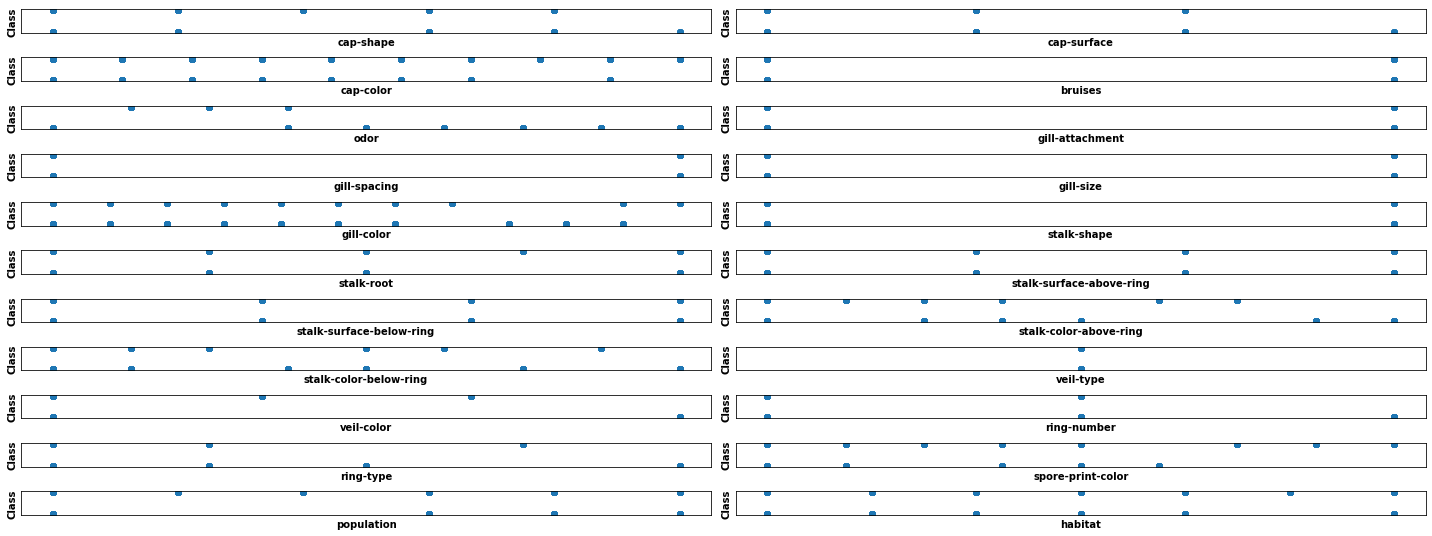

In [65]:
graph_columns(shroom_data, list(shroom_data.columns), "class")

<h4> Exploratory Data Analysis Discussion </h4>
• After some data exploration, we can see that the mushrooms maay be a good candidate for the kmeans algorithm comparatively to the mpg dataset.

• In the next cell, we can see that the features all are labels instead of numbers, which is needed by kmeans, which means we have to label encode them, which I did with the help of the label encoder from sklearn, because it did not seem relevant to learning about how to create a machine learning model, so I did not build it from scratch

In [78]:
shroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [187]:
shroom_data = shroom_data.apply(preprocessing.LabelEncoder().fit_transform)
shroom_data_X_train, shroom_data_X_test, shroom_data_y_train, shroom_data_y_test = \
    train_test_split(shroom_data.drop('class', axis=1), shroom_data['class'], test_size=0.2)

In [198]:
auto_data = auto_data.apply(preprocessing.LabelEncoder().fit_transform)
auto_data_X_train, auto_data_X_test, auto_data_y_train, auto_data_y_test = \
    train_test_split(auto_data.drop('mpg', axis=1), auto_data['mpg'], test_size=0.2)

In [209]:
#ARGS:
#   -> k (number): number of clusters
#   -> max_iterations (number): number of maximum iterations to perform of centroid calculation
#WHAT:
#   -> computes centroids and kmeans algo over a dataset
# ignored_states = np.seterr(**old_err_state)

class KMeans:
    def __init__(self, k=3, max_iterations=100):
        #100 because that's what I learned in 690
        self.k = k
        self.max_it = max_iterations
        self.centroids = []
        self.classes = dict()
        print(f"Initialized with k value of {self.k}")
        
    def distance(self, x1, x2):
        #let numpy figure out all of the math between points
        #using vector calculations
        return np.sqrt(np.sum(np.square(x1-x2), axis=1))
    
    def fit(self, dataset):
        #step 1, initialize
        for n in range(self.k):
            self.centroids.append(dataset.iloc[n].values)
        
        for iteration in range(self.max_it):
            print(f"Finished iteration {iteration}")
            self.classes = dict()
            for clust in range(self.k):
                self.classes[clust] = []
                
        
            #step 2 calculate
            for p in range(len(dataset)):
                dist = self.distance(self.centroids, dataset.iloc[p].values)
                #find index of minimum distance
                pred_classify = np.argmin(dist)
                #part 3
                self.classes[pred_classify].append(dataset.iloc[p])

            #part 4
            #copy prev centroids to overwrite
            prev_centroids = np.array(self.centroids)
            #average cluster distances and data to recompute the centroids
            for class_ in self.classes:
                self.centroids[class_] = np.average(self.classes[class_], axis=0)
                done = True
                
                new_centroids = np.array(self.centroids)
#                 print(np.sum(new_centroids - prev_centroids))
#                 print(np.sum(np.divide((new_centroids - prev_centroids), prev_centroids, out=np.zeros_like(new_centroids - prev_centroids), where=prev_centroids!=0) * 100))
                if abs(np.sum(np.divide((new_centroids - prev_centroids), prev_centroids, out=np.zeros_like(new_centroids - prev_centroids), where=prev_centroids!=0) * 100)) > 0.001:
                    done = False
            
            if done:
                break
    def predict(self, dataset, true_col):
        predictions = []
        for p in range(len(dataset)):
            dist = self.distance(self.centroids, dataset.iloc[p].values)
            pred_classify = np.argmin(dist)
            predictions.append(pred_classify)
        return np.sum(np.array(predictions) == true_col)/len(predictions)
    

In [210]:
clf = KMeans(k=2, max_iterations=50)
clf.fit(shroom_data_X_train)

Initialized with k value of 2
Finished iteration 0
Finished iteration 1
Finished iteration 2
Finished iteration 3
Finished iteration 4


In [211]:
clf.centroids

[array([3.35901573, 1.6434046 , 4.93868495, 0.52904397, 3.69100444,
        0.96672045, 0.19624849, 0.12545381, 6.22589754, 0.47014925,
        1.4509883 , 1.59197257, 1.62464704, 5.61436063, 5.59318273,
        0.        , 1.95683743, 1.05465914, 2.943929  , 2.51270674,
        3.61234369, 1.29790238]),
 array([3.29396496, 2.42959117, 3.12005191, 0.05515899, 5.58403634,
        1.        , 0.05126541, 0.8935756 , 0.16482803, 0.8935756 ,
        0.00713822, 1.52303699, 1.532122  , 6.43283582, 6.42310188,
        0.        , 2.        , 1.1064244 , 0.23361454, 6.98572356,
        3.77936405, 2.12719014])]

In [212]:
clf.predict(shroom_data_X_test, shroom_data_y_test)

0.7212307692307692

In [213]:
clf2 = KMeans(k=129, max_iterations=50)
clf2.fit(auto_data_X_train)

Initialized with k value of 129
Finished iteration 0
Finished iteration 1
Finished iteration 2
Finished iteration 3


In [214]:
clf2.centroids

[array([  4. ,  70. ,  27. , 270. ,  22. ,   4.5,   0. , 110. ]),
 array([  1.        ,  17.66666667,  68.66666667,  24.66666667,
         36.33333333,   9.        ,   1.        , 289.66666667]),
 array([  0.,   1.,  84.,  51.,  23.,   3.,   2., 174.]),
 array([  3.5,  56. ,  11.5, 232. ,  43.5,   8. ,   0.5, 207.5]),
 array([  4. ,  71.5,  34.5, 259.5,   3. ,   1.5,   0. , 209.5]),
 array([ 1. , 37. , 87.5, 86.5, 38. ,  4.5,  1. , 74.5]),
 array([  3.  ,  61.  ,   5.25, 273.25,  73.5 ,   4.75,   0.  ,  21.25]),
 array([  2.33333333,  45.66666667,   5.        , 139.33333333,
         20.33333333,  10.33333333,   0.66666667,  60.66666667]),
 array([  4.,  70.,  27., 233.,   6.,   3.,   0., 113.]),
 array([  4.  ,  78.5 ,  43.5 , 315.5 ,   3.75,   2.5 ,   0.  , 238.25]),
 array([  3.        ,  59.33333333,  74.        , 241.66666667,
         84.66666667,   7.66666667,   0.33333333, 193.        ]),
 array([ 1., 35.,  8., 78., 16.,  0.,  1., 22.]),
 array([  1. ,  15.5,  72. ,  28. ,  32.

In [215]:
clf2.predict(auto_data_X_test, auto_data_y_test)

0.0

In [216]:
#testing my model against sklearn
from sklearn.cluster import KMeans as sklearn_KMeans

In [217]:
sklearn_clf = sklearn_KMeans(n_clusters=2)
sklearn_clf.fit(shroom_data_X_train)
preds = sklearn_clf.predict(shroom_data_X_test)
np.sum(preds == shroom_data_y_test)/len(preds)

0.7212307692307692

In [218]:
sklearn_clf2 = sklearn_KMeans(n_clusters=129)
sklearn_clf2.fit(auto_data_X_train)
preds = sklearn_clf2.predict(auto_data_X_test)
np.sum(preds == auto_data_y_test)/len(preds)

0.0

<h2>Discussion</h2>
• Through testing both the datasets, I was able to show that my KMeans algorithm was just as good as the sklearn KMeans algorithm

• A dataset like auto mpg is not suited for kmeans because it is a large number of class, but I could have created mpg buckets to create new classes

• With a small number of classes, kmeans was able to perform very well in predicting which mushrooms were poisonous
